In [580]:
# 0.EXPLORATORY DATA ANALYSIS POINTS

#PREGUNTAS:S

#📌1.¿Cuántos clientes aceptaron el depósito a plazo? 
    # 🔹La variable objetivo suele ser "y", que indica si el cliente suscribió (yes) o no (no) el depósito.
    # 🔹Analizar cuántos dijeron "sí" vs. "no" nos ayuda a ver si los datos están balanceados o desequilibrados.


#📌2.¿Qué tipo de clientes son más propensos a aceptar la oferta?
    # 🔹Edad: ¿Los clientes más jóvenes o mayores aceptan más?
    # 🔹Trabajo: ¿Qué tipo de empleo tienen los clientes que aceptan?
    # 🔹Nivel educativo: ¿Importa el nivel de estudios en la decisión?


#📌3.¿Cuántas llamadas fueron necesarias para convencer a los clientes?
    # 🔹Duración de la última llamada (duration): ¿Las llamadas más largas aumentan la conversión?
    # 🔹Número de contactos (campaign): ¿Cuántas veces fue necesario llamar a un cliente antes de aceptar?


#📌4.¿Influyen las condiciones económicas en la decisión?
    # 🔹Mes de la campaña (month): ¿Hay meses con mejor respuesta?
    # 🔹Tasa de empleo (employment_rate): ¿El contexto económico afectó la decisión?


#📌5.¿Cómo interactúan los factores entre sí? 
    # 🔹¿La combinación de edad + educación influye en la decisión?
    # 🔹¿La duración de la llamada es más efectiva en ciertos grupos de clientes?


In [581]:
#🔸STEP 1: IMPORT PYTHON LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Visualizar todas las columnas
pd.set_option('display.max_columns', None)


In [582]:
#🔸STEP 2: READING DATASET

df_bank = pd.read_csv('bank-additional.csv', index_col = "id_")
df_bank.head(5)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude
id_,,,,,,,,,,,,,,,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233
e9d37224-cb6f-4942-98d7-46672963d097,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923
3f9f49b5-e410-4948-bf6e-f9244f04918b,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847
9991fafb-4447-451a-8be2-b0df6098d13e,3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463


In [583]:
#Ruta archivo del Excel - customer_details

file_path = "customer-details.xlsx"

# Leer todas las hojas (obtenemos un diccionario de DataFrames)
sheets_dict = pd.read_excel(file_path, sheet_name=None)

# Extraemos las hojas y asignamos el año usando 'map' sin bucles explícitos
df_customer_details = pd.concat(
    list(map(lambda df, year: df.assign(bank_registration_year=year), sheets_dict.values(), sheets_dict.keys())), 
    ignore_index=True).set_index("ID")

# Mostrar las primeras filas para verificar
df_customer_details.head()



,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,bank_registration_year
ID,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,0,161770,1,0,2012-04-04,29,2012
e9d37224-cb6f-4942-98d7-46672963d097,1,85477,1,1,2012-12-30,7,2012
3f9f49b5-e410-4948-bf6e-f9244f04918b,2,147233,1,1,2012-02-02,5,2012
9991fafb-4447-451a-8be2-b0df6098d13e,3,121393,1,2,2012-12-21,29,2012
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,4,63164,1,2,2012-06-20,20,2012


In [584]:
# ENTENDIENDO LOS DATOS:
    #---columns
    #---shape
    #---dtypes
    #---head
    #---tail
    #---describe
    #---info

In [585]:
# Ver las columnas 
df_customer_details.columns

Index(['Unnamed: 0', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'NumWebVisitsMonth', 'bank_registration_year'],
      dtype='object')

In [586]:
# Ver numero de filas y columnas 
df_customer_details.shape

(43170, 7)

In [587]:
# Ver tipo de datos 
df_customer_details.dtypes

Unnamed: 0                         int64
Income                             int64
Kidhome                            int64
Teenhome                           int64
Dt_Customer               datetime64[ns]
NumWebVisitsMonth                  int64
bank_registration_year            object
dtype: object

In [588]:
# Ver primeras 3 filas
df_customer_details.head(3)

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,bank_registration_year
ID,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,0,161770,1,0,2012-04-04,29,2012
e9d37224-cb6f-4942-98d7-46672963d097,1,85477,1,1,2012-12-30,7,2012
3f9f49b5-e410-4948-bf6e-f9244f04918b,2,147233,1,1,2012-02-02,5,2012


In [589]:
# Ver últimas 3 filas
df_customer_details.tail(3)

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth,bank_registration_year
ID,,,,,,,
d6271666-319d-42c8-a741-cb22bf2c2093,14087,78470,2,2,2014-10-28,12,2014
f67fbfa8-6573-414d-a805-b26a2f1b1ceb,14088,144218,0,1,2014-07-01,9,2014
9727bc06-c11a-461a-a5bb-3d210467cc2a,14089,115155,0,2,2014-12-25,7,2014


In [590]:
# Ver estadísticas generales
df_customer_details.describe()

,Unnamed: 0,Income,Kidhome,Teenhome,Dt_Customer,NumWebVisitsMonth
count,43170.000000,43170.000000,43170.000000,43170.000000,43170,43170.000000
mean,7916.022469,93227.389622,1.004749,0.998633,2013-05-11 22:09:47.407922176,16.591290
min,0.000000,5841.000000,0.000000,0.000000,2012-01-01 00:00:00,1.000000
25%,3597.000000,49608.000000,0.000000,0.000000,2012-07-16 00:00:00,9.000000
50%,7194.500000,93009.500000,1.000000,1.000000,2013-03-01 00:00:00,17.000000
75%,11705.750000,136740.500000,2.000000,2.000000,2014-03-28 00:00:00,25.000000
max,20114.000000,180802.000000,2.000000,2.000000,2014-12-31 00:00:00,32.000000
std,5228.248885,50498.181989,0.815996,0.816008,NaN,9.241769


In [591]:
# Ver detalles
df_customer_details.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43170 entries, 089b39d8-e4d0-461b-87d4-814d71e0e079 to 9727bc06-c11a-461a-a5bb-3d210467cc2a
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              43170 non-null  int64         
 1   Income                  43170 non-null  int64         
 2   Kidhome                 43170 non-null  int64         
 3   Teenhome                43170 non-null  int64         
 4   Dt_Customer             43170 non-null  datetime64[ns]
 5   NumWebVisitsMonth       43170 non-null  int64         
 6   bank_registration_year  43170 non-null  object        
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 2.6+ MB


In [592]:
# Ver numero de filas y columnas 
df_bank.shape

(43000, 23)

In [593]:
# Ver las columnas 
df_bank.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date', 'latitude',
       'longitude'],
      dtype='object')

In [594]:
# Ver tipo de datos 
df_bank.dtypes

Unnamed: 0          int64
age               float64
job                object
marital            object
education          object
default           float64
housing           float64
loan              float64
contact            object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx     object
cons.conf.idx      object
euribor3m          object
nr.employed        object
y                  object
date               object
latitude          float64
longitude         float64
dtype: object

In [595]:
# Ver primeras 3 filas
df_bank.head(3)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude
id_,,,,,,,,,,,,,,,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233
e9d37224-cb6f-4942-98d7-46672963d097,1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923
3f9f49b5-e410-4948-bf6e-f9244f04918b,2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847


In [596]:
# Ver últimas 3 filas
df_bank.tail(3)

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude
id_,,,,,,,,,,,,,,,,,,,,,,,
cadadd4b-7ee5-4019-b13a-ca01bb67ca5b,15046,NaN,blue-collar,SINGLE,basic.6y,0.0,1.0,0.0,cellular,391,2,999,0,NONEXISTENT,1.4,"93,918","-42,7",NaN,"5228,1",no,15-septiembre-2016,40.679,-120.015
5f432048-d515-4bb5-9c94-62db451f88d4,15280,NaN,admin.,MARRIED,university.degree,NaN,0.0,0.0,cellular,674,3,999,0,NONEXISTENT,1.4,"93,918","-42,7","4,958","5228,1",no,23-septiembre-2019,27.772,-117.518
993bbbd6-4dbc-4a40-a408-f91f8462bee6,27570,NaN,unemployed,SINGLE,university.degree,0.0,0.0,1.0,cellular,104,2,999,0,NONEXISTENT,-0.1,"93,2",-42,"4,021","5195,8",no,6-noviembre-2019,41.146,-105.026


In [597]:
# Ver estadísticas generales
df_bank.describe()

,Unnamed: 0,age,default,housing,loan,duration,campaign,pdays,previous,emp.var.rate,latitude,longitude
count,43000.000000,37880.000000,34019.000000,41974.000000,41974.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000,43000.000000
mean,20651.099047,39.977112,0.000088,0.535998,0.155620,257.739279,2.567233,962.330953,0.174023,0.077128,36.856697,-95.939067
std,11868.770913,10.437957,0.009390,0.498708,0.362499,258.666033,2.772294,187.260394,0.497366,1.573898,7.225948,16.752282
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,24.396000,-124.997000
25%,10381.750000,32.000000,0.000000,0.000000,0.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,30.614750,-110.494250
50%,20642.500000,38.000000,0.000000,1.000000,0.000000,179.000000,2.000000,999.000000,0.000000,1.100000,36.761000,-95.899500
75%,30930.250000,47.000000,0.000000,1.000000,0.000000,319.000000,3.000000,999.000000,0.000000,1.400000,43.113250,-81.427750
max,41187.000000,98.000000,1.000000,1.000000,1.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,49.384000,-66.937000


In [598]:
# Ver detalles
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 089b39d8-e4d0-461b-87d4-814d71e0e079 to 993bbbd6-4dbc-4a40-a408-f91f8462bee6
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      43000 non-null  int64  
 1   age             37880 non-null  float64
 2   job             42655 non-null  object 
 3   marital         42915 non-null  object 
 4   education       41193 non-null  object 
 5   default         34019 non-null  float64
 6   housing         41974 non-null  float64
 7   loan            41974 non-null  float64
 8   contact         43000 non-null  object 
 9   duration        43000 non-null  int64  
 10  campaign        43000 non-null  int64  
 11  pdays           43000 non-null  int64  
 12  previous        43000 non-null  int64  
 13  poutcome        43000 non-null  object 
 14  emp.var.rate    43000 non-null  float64
 15  cons.price.idx  42529 non-null  object 
 16  cons.conf.idx  

In [599]:
# 🔸STEP 3: DATA REDUCTION
    # Eliminación de columnas y filas irrelevantes
    # Renombrar columnas
    # Identificación de columnas duplicadas
    # Creación de características
    # Normalizar datos 

In [600]:
# 3.1. Eliminación de columnas y columnas irrelevantes de los dataframes 'df_bank' y 'df_customer' 
df_bank_clean = df_bank.drop(columns=['Unnamed: 0','marital','default','housing','loan','pdays','previous','poutcome'
                                      ,'cons.price.idx','cons.conf.idx','euribor3m','date','latitude','longitude'])

In [601]:
df_bank_clean.columns

Index(['age', 'job', 'education', 'contact', 'duration', 'campaign',
       'emp.var.rate', 'nr.employed', 'y'],
      dtype='object')

In [602]:
df_customer_details_cln = df_customer_details.drop(columns=['Unnamed: 0','Kidhome', 'Teenhome',
                     'NumWebVisitsMonth'])

In [603]:
# 3.2. Renombrar columnas
df_bank_clean = df_bank_clean.rename(columns={'age':'Customer age',
                              'job':'Job',
                              'education':'Education',
                              'contact':'Contact method',
                              'duration':'Last int duration',
                              'campaign':'Interactions in campaign',
                              'emp.var.rate':'Employment variation rate',
                              'nr.employed':'Employees number',
                              'y':'Product/service subscription',
                              'id_':'ID'
                        })

In [604]:
df_customer_details_cln = df_customer_details_cln.rename(columns={'Income':'Customer annual income',
                                       'Dt_Customer':'Registration date',
                                       'bank_registration_year':'Registration year'})

In [605]:
# 3.3. Identificar valores nulos y manejar missing values
df_bank_clean.isna().sum()

Customer age                    5120
Job                              345
Education                       1807
Contact method                     0
Last int duration                  0
Interactions in campaign           0
Employment variation rate          0
Employees number                   0
Product/service subscription       0
dtype: int64

In [606]:
# Para ver el porcentaje de nulos en cada columna del dataframe
(df_bank_clean.isnull().sum()/(len(df_bank_clean)))*100

Customer age                    11.906977
Job                              0.802326
Education                        4.202326
Contact method                   0.000000
Last int duration                0.000000
Interactions in campaign         0.000000
Employment variation rate        0.000000
Employees number                 0.000000
Product/service subscription     0.000000
dtype: float64

In [607]:
(df_customer_details_cln.isnull().sum()/(len(df_customer_details_cln)))*100

Customer annual income    0.0
Registration date         0.0
Registration year         0.0
dtype: float64

In [608]:
# Los nulos de 'Age' los sustituyo por la mediana
df_bank_clean['Customer age'].fillna(df_bank_clean['Customer age'].median(), inplace=True)

C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\701091345.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank_clean['Customer age'].fillna(df_bank_clean['Customer age'].median(), inplace=True)


In [609]:
# Los nulos de 'Job' los sustituyo por la moda

df_bank_clean['Job'].fillna(df_bank_clean['Job'].mode()[0], inplace=True)

C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\2403905030.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank_clean['Job'].fillna(df_bank_clean['Job'].mode()[0], inplace=True)


In [610]:
# Los nulos de 'Education' los sustituyo por 'Desconocido'

df_bank_clean['Education'].fillna('Desconocido', inplace=True)

C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\2764473026.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_bank_clean['Education'].fillna('Desconocido', inplace=True)


In [611]:
# 3.4. Eliminar duplicados 
df_bank_clean = df_bank_clean.drop_duplicates()

In [612]:
df_bank_clean

,Customer age,Job,Education,Contact method,Last int duration,Interactions in campaign,Employment variation rate,Employees number,Product/service subscription
id_,,,,,,,,,
089b39d8-e4d0-461b-87d4-814d71e0e079,38.0,housemaid,basic.4y,telephone,261,1,1.1,5191,no
e9d37224-cb6f-4942-98d7-46672963d097,57.0,services,high.school,telephone,149,1,1.1,5191,no
3f9f49b5-e410-4948-bf6e-f9244f04918b,37.0,services,high.school,telephone,226,1,1.1,5191,no
9991fafb-4447-451a-8be2-b0df6098d13e,40.0,admin.,basic.6y,telephone,151,1,1.1,5191,no
eca60b76-70b6-4077-80ba-bc52e8ebb0eb,56.0,services,high.school,telephone,307,1,1.1,5191,no
...,...,...,...,...,...,...,...,...,...
9d2f38f5-ce04-406b-b8b7-b77219934a45,38.0,management,basic.9y,telephone,224,3,1.1,5191,no
29b41e0a-0690-457f-be7f-950945897c02,42.0,housemaid,high.school,cellular,95,3,-1.8,"5099,1",no
263867fd-76f7-4bfa-8ce5-4d925121eacd,59.0,services,high.school,telephone,231,1,1.1,5191,no


In [613]:
df_customer_details_cln = df_customer_details_cln.drop_duplicates()

In [614]:
# 3.4. Normalizar datos

# Convertir a int la edad
def cambiar_a_int(num):
    """Transforma numero en tipo int

    Args:
        num (float or int): numero de argumento

    Returns:
        int: devuelve un numero transformado en int
    """
    return int(num)


df_bank_clean['Customer age'] = df_bank_clean['Customer age'].apply(cambiar_a_int)


In [615]:
df_bank_clean['Education'].values

array(['basic.4y', 'high.school', 'high.school', ..., 'high.school',
       'basic.4y', 'basic.9y'], shape=(40756,), dtype=object)

In [616]:
# Convertir a palabras legibles el nivel educativo
print(df_bank_clean['Education'].unique())

education_mapping = {'basic.4y':'Basic 4 years', 'high.school':'High School', 'basic.6y':'Basic 6 years',
                     'basic.9y':'Basic 9 years', 'professional.course':'Professional Course',
                     'university.degree':'University Degree', 'illiterate':'Illiterate'}


df_bank_clean['Education'] = df_bank_clean['Education'].replace(education_mapping)

['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'Desconocido' 'university.degree' 'illiterate']


In [617]:
#Convertir 'Employees number' a int

# 1. Reemplazar la coma por un punto
df_bank_clean['Employees number'] = df_bank_clean['Employees number'].str.replace(',', '.')

# 2. Convertir a número decimal (float)
df_bank_clean['Employees number'] = pd.to_numeric(df_bank_clean['Employees number'], errors='coerce')

# 3. Eliminar los valores NaN que se han podido generar.
df_bank_clean = df_bank_clean.dropna(subset=['Employees number'])

# 4. Convertir a entero (int)
df_bank_clean['Employees number'] = df_bank_clean['Employees number'].astype('int')


In [618]:
#Convertir otras columnas con tipo object a category

df_bank_clean['Education'] = df_bank_clean['Education'].astype('category')

df_bank_clean['Job'] = df_bank_clean['Job'].astype('category')

df_bank_clean['Contact method'] = df_bank_clean['Contact method'].astype('category')


In [619]:
#Convertir a numerico los valores de la columna 'Product/service subscription '

df_bank_clean["Product/service subscription"] = df_bank_clean["Product/service subscription"].map({"yes": 1, "no": 0})


In [620]:
df_customer_details_cln['Registration year'] = df_customer_details_cln['Registration year'].astype('int')

In [621]:
df_customer_details_cln.dtypes

Customer annual income             int64
Registration date         datetime64[ns]
Registration year                  int64
dtype: object

In [622]:
# 🔸STEP 4: DATASETS COMBINATION 
    # Combinación de Datasets
    # Limpieza de nulos y duplicados
    # Generar nuevas columnas

In [623]:
#Combinación de los dos DATAFRAMES
df_merged = df_bank_clean.merge(df_customer_details_cln, left_on='id_', right_on='ID', how='left')

In [625]:
df_merged['Registration year'] = df_merged['Registration year'].astype('int')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

In [ ]:
df_merged.dtypes

Customer age                             int64
Job                                   category
Education                             category
Contact method                        category
Last int duration                        int64
Interactions in campaign                 int64
Employment variation rate              float64
Employees number                         int64
Product/service subscription             int64
Customer annual income                 float64
Registration date               datetime64[ns]
Registration year                        int64
dtype: object

In [ ]:
#Calculo el porcentaje de nulos en cada columna del dataset 'merged'
(df_merged.isnull().sum()/(len(df_merged)))*100

Customer age                    0.000000
Job                             0.000000
Education                       0.000000
Contact method                  0.000000
Last int duration               0.000000
Interactions in campaign        0.000000
Employment variation rate       0.000000
Employees number                0.000000
Product/service subscription    0.000000
Customer annual income          0.007361
Registration date               0.007361
Registration year               0.007361
dtype: float64

In [ ]:
# Sustituir nulos de 'Job' del dataframe 'merged'
df_merged['Job'].fillna(df_merged['Job'].mode()[0], inplace=True)

C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\1478765561.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Job'].fillna(df_merged['Job'].mode()[0], inplace=True)


In [ ]:
# Sustituir nulos de 'Education' del dataframe 'merged'
df_merged['Education'].fillna('Desconocido', inplace=True)

C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\3196013591.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_merged['Education'].fillna('Desconocido', inplace=True)


In [ ]:
#Eliminar duplicados del dataframe 'merged'
df_merged = df_merged.drop_duplicates()

In [ ]:
df_merged.isnull().sum()

Customer age                    0
Job                             0
Education                       0
Contact method                  0
Last int duration               0
Interactions in campaign        0
Employment variation rate       0
Employees number                0
Product/service subscription    0
Customer annual income          3
Registration date               3
Registration year               3
dtype: int64

In [ ]:
# Eliminar nulos del dataset 'merged'

df_merged = df_merged.dropna(subset=['Customer annual income'])
df_merged.isnull().sum()

Customer age                    0
Job                             0
Education                       0
Contact method                  0
Last int duration               0
Interactions in campaign        0
Employment variation rate       0
Employees number                0
Product/service subscription    0
Customer annual income          0
Registration date               0
Registration year               0
dtype: int64

In [ ]:
# Ver tipo de datos 
df_customer_details.dtypes

df_merged.dtypes


Customer age                             int64
Job                                   category
Education                             category
Contact method                        category
Last int duration                        int64
Interactions in campaign                 int64
Employment variation rate              float64
Employees number                         int64
Product/service subscription             int64
Customer annual income                 float64
Registration date               datetime64[ns]
Registration year                      float64
dtype: object

In [ ]:

df_merged.head(2)

,Customer age,Job,Education,Contact method,Last int duration,Interactions in campaign,Employment variation rate,Employees number,Product/service subscription,Customer annual income,Registration date,Registration year
0,38,housemaid,Basic 4 years,telephone,261,1,1.1,5191,0,161770.0,2012-04-04,2012.0
1,57,services,High School,telephone,149,1,1.1,5191,0,85477.0,2012-12-30,2012.0


In [ ]:
df_merged.dtypes    

Customer age                             int64
Job                                   category
Education                             category
Contact method                        category
Last int duration                        int64
Interactions in campaign                 int64
Employment variation rate              float64
Employees number                         int64
Product/service subscription             int64
Customer annual income                 float64
Registration date               datetime64[ns]
Registration year                      float64
dtype: object

In [ ]:
#Generar nueva columna del mes en que se contacto al cliente durante la campaña

# Crear una nueva columna 'Interaction month' con el mes en que se realizó la interacción
df_merged['Interaction month'] = df_merged['Registration date'].dt.month_name()

# Verificar los primeros registros
print(df_merged[['Registration date', 'Interaction month']].head())


  Registration date Interaction month
0        2012-04-04             April
1        2012-12-30          December
2        2012-02-02          February
3        2012-12-21          December
4        2012-06-20              June


In [ ]:
#🔸STEP 5:GRAPHICS

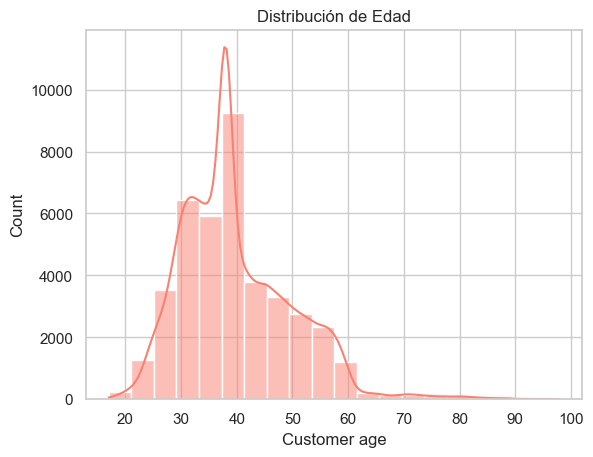

In [ ]:
#Distribucion de la edad
age_ax =sns.histplot(df_merged['Customer age'], bins=20, kde=True, color='salmon')
age_ax.set_title("Distribución de Edad")
plt.show()


C:\Users\pooo_\AppData\Local\Temp\ipykernel_13692\143776166.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_bank['job'], order=df_bank['job'].value_counts().index, palette="coolwarm")


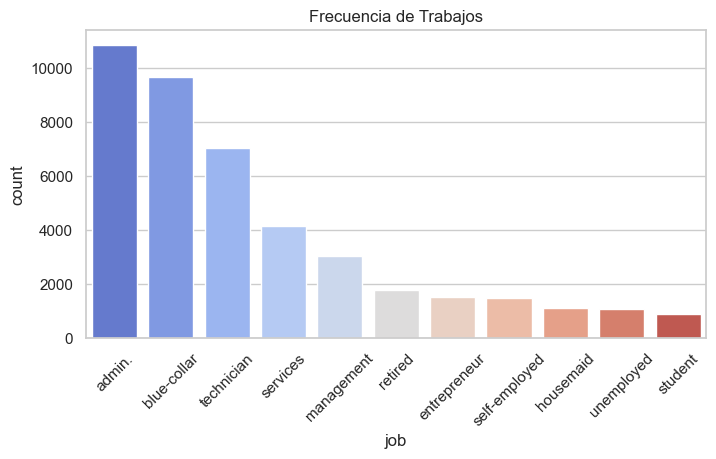

In [ ]:
plt.figure(figsize=(8, 4))  # Ajusta el tamaño para mejor visibilidad
sns.countplot(x=df_bank['job'], order=df_bank['job'].value_counts().index, palette="coolwarm")
plt.title("Frecuencia de Trabajos")
plt.xticks(rotation=45)  # Rota etiquetas para que sean legibles
plt.show()

C:\Users\pooo_\AppData\Local\Temp\ipykernel_13692\354821560.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(data=df_merged, x=df_merged['Product/service subscription'].replace({0:'no',1:'yes'}), palette=['salmon','skyblue'])


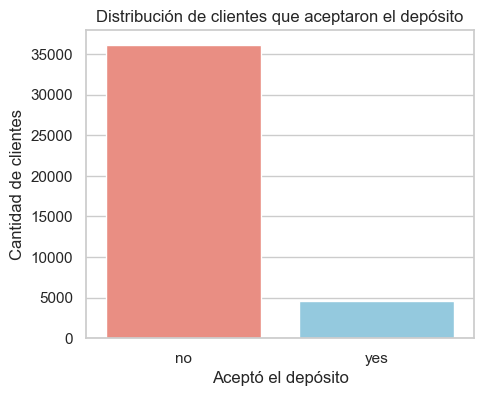

Porcentaje de aceptación:11.34%


In [ ]:
#📌1. ¿Cuántos clientes aceptaron el depósito a plazo?

plt.figure(figsize=(5, 4)) 

ax1 = sns.countplot(data=df_merged, x=df_merged['Product/service subscription'].replace({0:'no',1:'yes'}), palette=['salmon','skyblue'])
ax1.set_title('Distribución de clientes que aceptaron el depósito')
ax1.set_xlabel('Aceptó el depósito')
ax1.set_ylabel('Cantidad de clientes')

plt.show(ax1)

#Calculo la media de aceptación del depósito
acceptance_rate = df_merged['Product/service subscription'].mean()*100
print(f'Porcentaje de aceptación:{acceptance_rate:.2f}%')


C:\Users\pooo_\AppData\Local\Temp\ipykernel_13692\2085861992.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.boxplot(data=df_merged, x=df_merged['Product/service subscription'].replace({0:'no',1:'yes'}), y="Customer age", palette=['salmon','skyblue'])


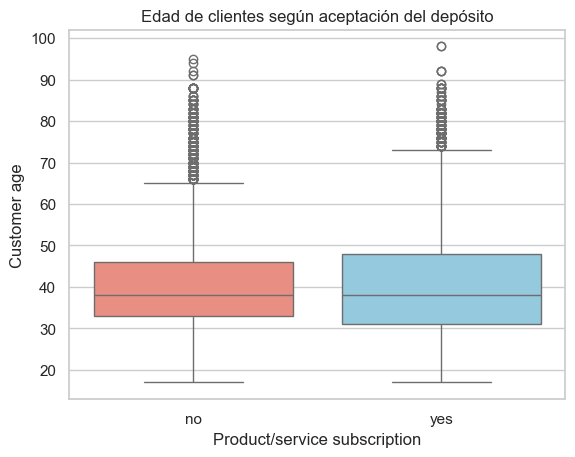

C:\Users\pooo_\AppData\Local\Temp\ipykernel_13692\2085861992.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax3 = sns.barplot(data=df_merged, x="Job", y='Product/service subscription', estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_13692\2085861992.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax3 = sns.barplot(data=df_merged, x="Job", y='Product/service subscription', estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_13692\2085861992.py:9: UserWarning: 
The palette list has fewer values (2) than needed (11) and will cycle, which may produce an uninterpretable plot.
  ax3 = sns.barplot(data=df_merged, x="Job", y='Product/service subscription', estima

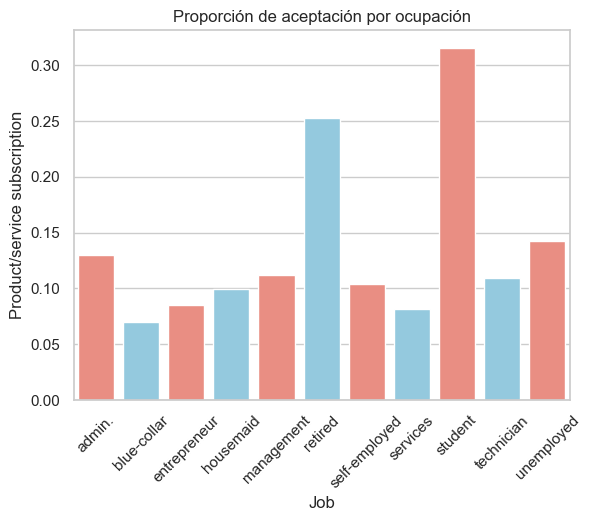

C:\Users\pooo_\AppData\Local\Temp\ipykernel_13692\2085861992.py:15: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax4 = sns.barplot(data=df_merged, x="Education", y="Product/service subscription", estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_13692\2085861992.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax4 = sns.barplot(data=df_merged, x="Education", y="Product/service subscription", estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
C:\Users\pooo_\AppData\Local\Temp\ipykernel_13692\2085861992.py:15: UserWarning: 
The palette list has fewer values (2) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax4 = sns.barplot(data=df_merged, x="Education", y="Product/service s

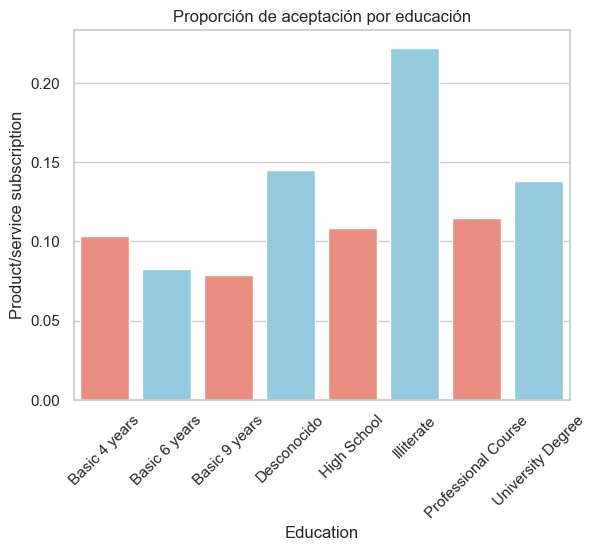

In [ ]:
#📌2. ¿Qué tipo de clientes son más propensos a aceptar la oferta?

# Edad vs. Suscripción
ax2 = sns.boxplot(data=df_merged, x=df_merged['Product/service subscription'].replace({0:'no',1:'yes'}), y="Customer age", palette=['salmon','skyblue'])
ax2.set_title('Edad de clientes según aceptación del depósito')
plt.show()  

# Trabajo vs. Suscripción
ax3 = sns.barplot(data=df_merged, x="Job", y='Product/service subscription', estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
ax3.set_title('Proporción de aceptación por ocupación')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje X
plt.show()  

# Nivel educativo vs. Suscripción
ax4 = sns.barplot(data=df_merged, x="Education", y="Product/service subscription", estimator=lambda x: sum(x) / len(x), palette=['salmon','skyblue'], ci=None)
ax4.set_title('Proporción de aceptación por educación')
plt.xticks(rotation=45)  # Rotar etiquetas en el eje X
plt.show() 


C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\3863127240.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax5 =  sns.boxplot(data=df_merged, x=df_merged['Product/service subscription'].replace({0:'no',1:'yes'}), y="Last int duration", palette=['salmon','skyblue'])


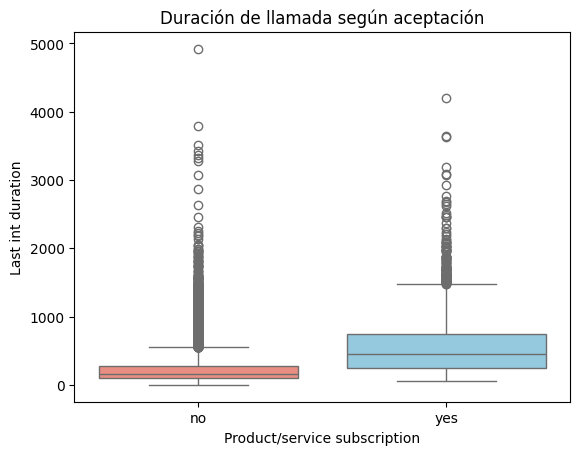

C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\3863127240.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax6 = sns.boxplot(data=df_bank_clean, x="Product/service subscription", y="Interactions in campaign", palette=['salmon','skyblue'])


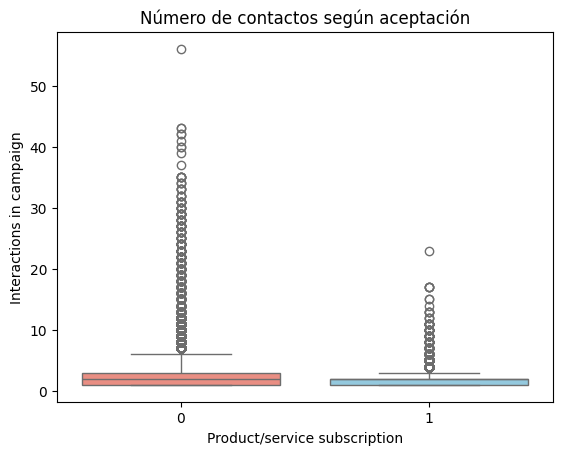

In [ ]:
#📌3. ¿Cuántas llamadas fueron necesarias para convencer a los clientes?

# Duración de la llamada vs. Conversión
ax5 =  sns.boxplot(data=df_merged, x=df_merged['Product/service subscription'].replace({0:'no',1:'yes'}), y="Last int duration", palette=['salmon','skyblue'])
ax5.set_title('Duración de llamada según aceptación')
plt.show()

#Número de intentos vs. Conversión
ax6 = sns.boxplot(data=df_bank_clean, x="Product/service subscription", y="Interactions in campaign", palette=['salmon','skyblue'])
ax6.set_title('Número de contactos según aceptación')
plt.show()

C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\3077333523.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax7 = sns.barplot(data=df_merged, x="Interaction month", y="Product/service subscription", estimator=lambda x: sum(x) / len(x), palette=['skyblue','salmon'], ci=None )
C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\3077333523.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax7 = sns.barplot(data=df_merged, x="Interaction month", y="Product/service subscription", estimator=lambda x: sum(x) / len(x), palette=['skyblue','salmon'], ci=None )
C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\3077333523.py:7: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  ax7 = sns.barplot(data=df_merged, x="Interaction month",

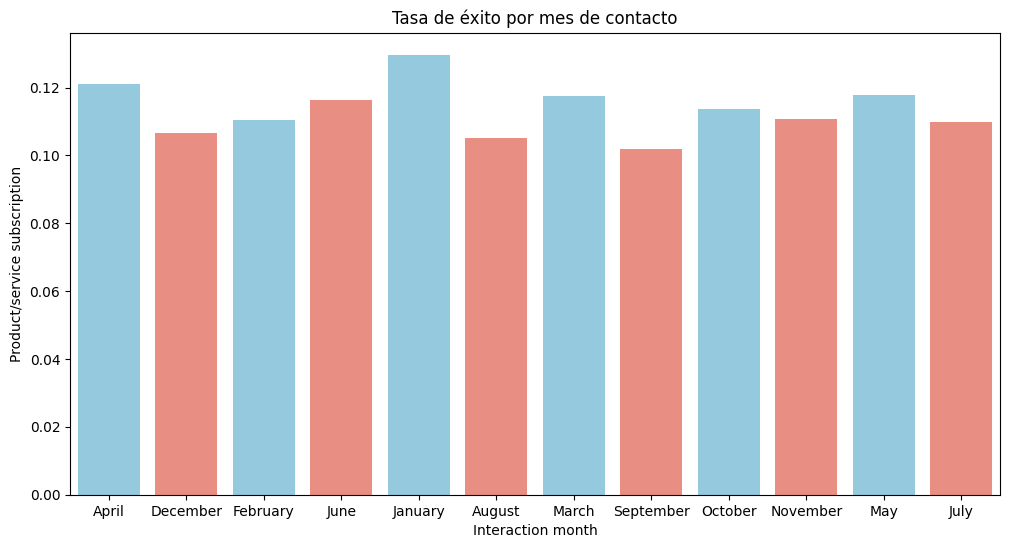

C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\3077333523.py:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  ax8 = sns.scatterplot(data=df_merged, x="Employment variation rate", y="Product/service subscription",palette=['skyblue','salmon'], alpha=0.5)


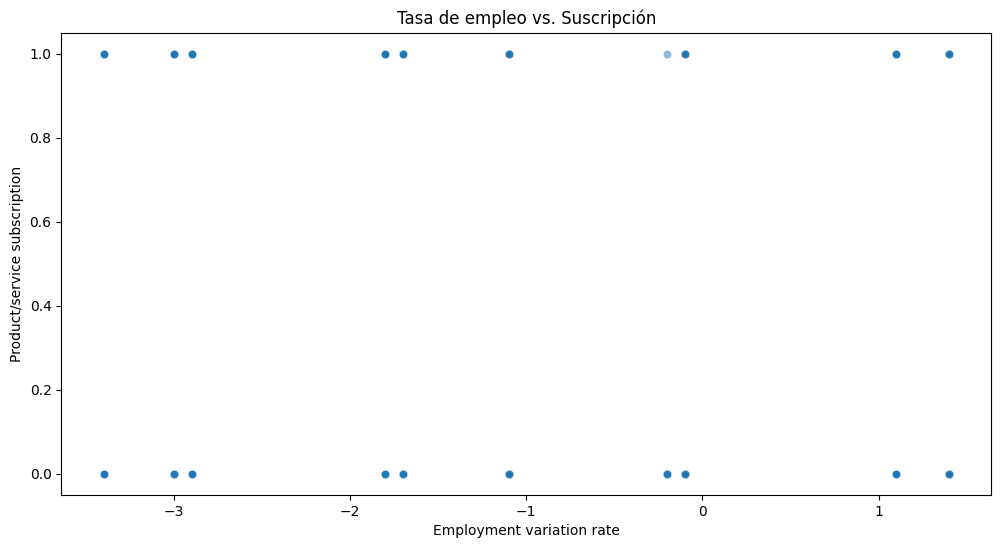

In [ ]:
#📌4. ¿Influyen las condiciones económicas en la decisión?

# Ajustar el tamaño de la figura para ax7
plt.figure(figsize=(12, 6))  # Puedes cambiar el tamaño a tu preferencia

# Mes de la campaña vs. Tasa de éxito
ax7 = sns.barplot(data=df_merged, x="Interaction month", y="Product/service subscription", estimator=lambda x: sum(x) / len(x), palette=['skyblue','salmon'], ci=None )
ax7.set_title('Tasa de éxito por mes de contacto')

# Mostrar el gráfico
plt.show()

# Ajustar el tamaño de la figura para ax8 (si lo deseas)
plt.figure(figsize=(12, 6))  # También puedes ajustar el tamaño para ax8

# Tasa de empleo vs. Conversión
ax8 = sns.scatterplot(data=df_merged, x="Employment variation rate", y="Product/service subscription",palette=['skyblue','salmon'], alpha=0.5)
ax8.set_title("Tasa de empleo vs. Suscripción")

# Mostrar el gráfico
plt.show()



C:\Users\pooo_\AppData\Local\Temp\ipykernel_8452\392278625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_merged, x='Interaction month', palette='coolwarm')


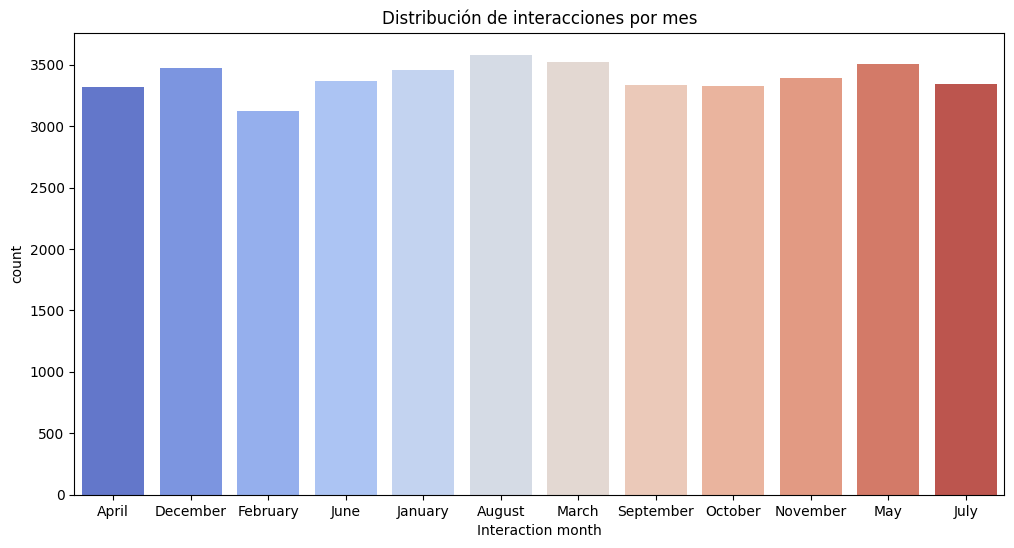

In [ ]:
# Ajustar el tamaño de la figura
plt.figure(figsize=(12, 6))  # Puedes cambiar el tamaño a tu preferencia

# Gráfico usando la columna 'Interaction month'
sns.countplot(data=df_merged, x='Interaction month', palette='coolwarm')

# Agregar título y mostrar
plt.title("Distribución de interacciones por mes")
plt.show()


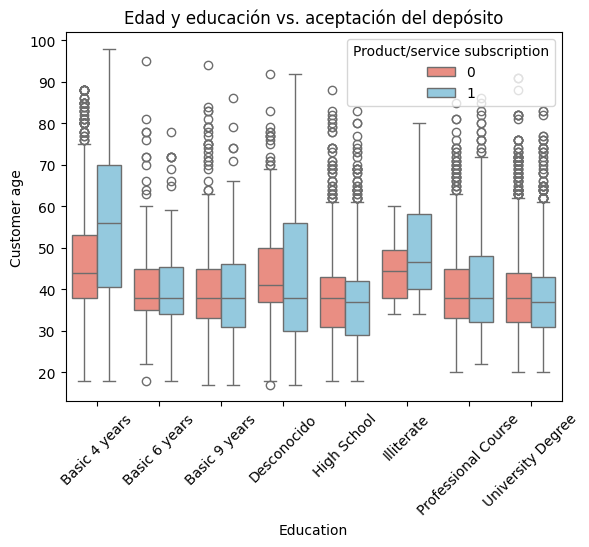

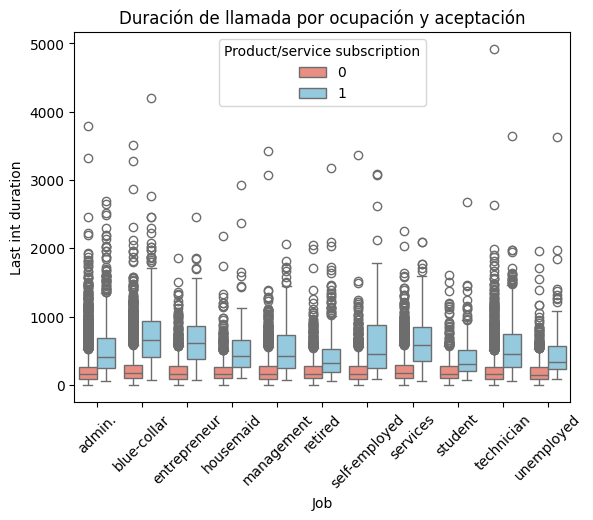

In [ ]:
#📌5. ¿Cómo interactúan los factores entre sí?

# Edad + Educación vs. Suscripción
ax9= sns.boxplot(data=df_merged, x="Education", y="Customer age", hue="Product/service subscription", palette=['salmon','skyblue'])
plt.xticks(rotation=45)
ax9.set_title("Edad y educación vs. aceptación del depósito")
plt.show()

#Duración de llamada en diferentes grupos
ax10 = sns.boxplot(data=df_merged, x="Job", y="Last int duration", hue="Product/service subscription", palette=['salmon','skyblue'])
plt.xticks(rotation=45)
ax10.set_title("Duración de llamada por ocupación y aceptación")
plt.show() 


In [ ]:
#Guardar datos transformados

# Crear la carpeta si no existe
ruta_guardado = "datos_transformados"
os.makedirs(ruta_guardado, exist_ok=True)

# Guardar los archivos en la carpeta
#df.to_csv(os.path.join(ruta_guardado, 'datos_transformados.csv'), index=False)
df_merged.to_excel(os.path.join(ruta_guardado, 'datos_transformados.xlsx'), index=False)


